<a href="https://colab.research.google.com/github/rcmolokwu/FoodNET/blob/master/Nigerian_Foods_Classfication_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Welcome to my Deep learning project on Nigerian Cousine recognition using [Fast.ai](https://fast.ai) and [Pytorch](https://pytorch.org)** 


---

The dataset for this project was manually created by googling up images of different cousines using the [google Image](https://images.google.com) website and also taking photographs of food prepared by [myself ](https://rcmolokwu,site)and other collegues of mine.

A total of 20 different Food cousines were arranged namely:


1.   Rice and stew
2.   Jollof rice
3. Ofe Nsala (White soup)
4. Egusi soup
5. Draw soup
6. Ewedu soup
7. Ofe Akwu (palm oil soup)
8. Akara
9. Moi moi
10. Bitter leaf soup (ofe Onugbu)
11. Nkwobi (pepper soup/goat meat)
12. Ora soup
13. Suya
14. Kilishi
15. Zobo
16. Beans and Yam
17. Yam Porridge
18. Noodles
19. Shawarma
20. Soaking garri


Each of this data array contained over 150 images and a total of over 3000 images with size of 700+MB.
The images are hosted online on my private server and are  available for public use on request with a little token.

### *Now lets dive into the real project!!.*

In [0]:
#Importing our libraries
from fastai.vision import * #Our high level library
from fastai.metrics import error_rate #Our metrics evaluator
import matplotlib.pyplot as plt #Visualization library

Using colab - If you run a script which creates/ downloads files, (Just like ours), the files will NOT persist after the allocated instance is shutdown. To save files, you need to permit your Colaboratory instance to read and write files to your Google Drive. Adding the following code snippet at the beginning of every notebook, solves the problem

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
#Setting some notebook changes
%matplotlib inline 
#TO show plots as output
!curl -s https://course.fast.ai/setup/colab | bash #Updating Fastai - A good practice

Updating fastai...
Done.


In [4]:
import torch #Importing pytorch
print(torch.__version__) #Printing our version running
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


1.1.0


In [0]:
#Setting some parameters for our Image data bunch
batchSize = 64 #Number of images to user per training
imageSize = 224 #the size of the cropped image for covolution
rows = 5 #Number of rows for rendering images
figSize = (9,9) #Figure size for rendering images
seed = 42 #Number of Seeds to use
epochs = 4 #Training cycle

### Retrieving our dataset from google cloud storage

In [0]:
path = '/content/drive/My Drive/fastai/NigerianFood'
np.random.seed(seed) #Setting seed to get the same data when runned over

In [8]:
path

'/content/drive/My Drive/fastai/NigerianFood'

Now that our dataset has been retrieved from google cloud storage, it is time to load it into a pandas - like - dataFrame so that we can be able to view our data before moving it for training.
in the below code, it is useful to know that i did not create a validation folder, therefore i have notified fastai to do so using the *valid_pct=0.2* to specifiy that i need 20% of my data for testing and 80% for training.
also we had to normalize our data so as to avoid overfitting.
imageSize and batchSize has been explained above 
*train="."* tells fastai that i want to train from this file (data)
 NB i did not do any cleaning here, to check for files that are corrupt or bad format because during collection and i did the cleaning with my local machine. Therefore it is assumed that my datasets are clean and right
### *#A good data leads to better accuracy!*

---

### *Now lets view our data and see what our dataset looks like before sending it for modeling*

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1,
      ds_tfms=get_transforms(), size=imageSize, bs=batchSize, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes #Lets see our classes or labels

['Beans and Yam',
 'Bitter leaf soup - Ofe Onugbu',
 'Kilishi - Dry meat',
 'Naija Jollof Rice',
 'Nigerian Akara',
 'Nigerian Draw soup',
 'Nigerian Egusi soup',
 'Nigerian Ewedu soup',
 'Nigerian Moi Moi',
 'Nigerian Nkwobi',
 'Nigerian Noodles',
 'Nigerian Nsala soup - White soup',
 'Nigerian Ora soup',
 'Nigerian Rice and Tomatoe stew',
 'Nigerian Suya',
 'Nigerian Yam porridge',
 'Nigerian Zobo',
 'Palm oil Soup',
 'Shawarma',
 'Soaking Garri - Naija Manpower']

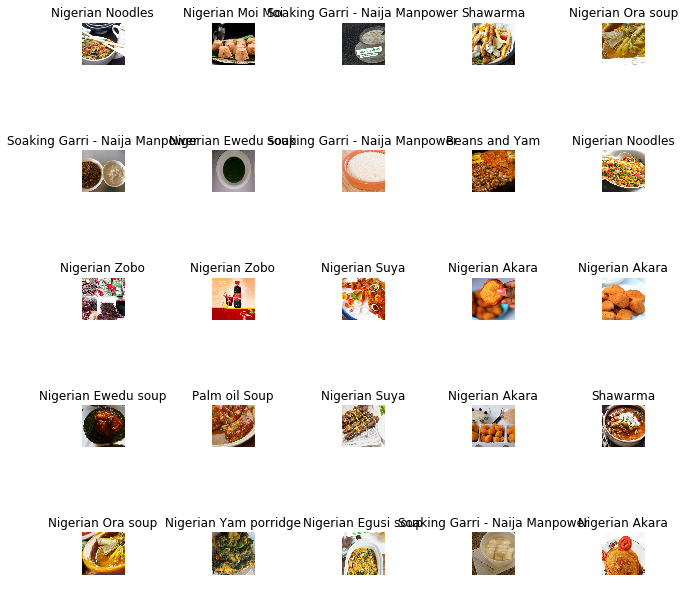

In [10]:
data.show_batch(rows=rows, figsize=figSize)

In [11]:
#Lets check how many entries we have for training and testing
print("Number of training samples are - " + str(len(data.train_ds)));
print("Number of validating samples are - " + str(len(data.valid_ds)));

Number of training samples are - 2107
Number of validating samples are - 234


Its time to model our architecture for predicition using transfer learning
why transfer learning?
it is difficult and time consuming to create a CNN architecture from scratch when you dont have sufficient data, most of the time, your model will perform poorly. So the intuition is to transfer the learning that a model developed and trained on over 5million images to our own dataset. This is done by simply removing the first and the last layer of the transfered  network. 
In my case, i am using the Residual Network 152 (Resnet-152) which has 152 layers to train my images.

Lets develope the model!!

In [12]:
model = cnn_learner(data, models.vgg16_bn, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:06<00:00, 91071443.78it/s]


In [13]:
#Lets train our dataset with the newly created model and train it for 10 epochs
model.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,error_rate,time
0,2.796984,1.596178,0.431624,03:56
1,1.785449,0.874680,0.252137,02:34
2,1.298355,0.800193,0.256410,02:34
3,1.030771,0.782219,0.243590,02:36


In [0]:
#Saving the model
model.save('partOne')

In [0]:
#Let us unfreeze our architecture and find the best learning rate
model.unfreeze()

In [16]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


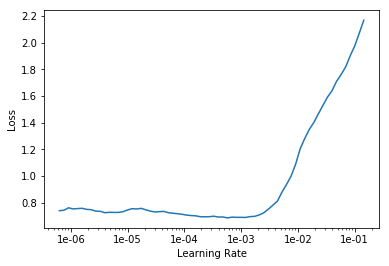

In [17]:
#Ploting the graph of our learning rate to find the best
model.recorder.plot()

In [18]:
#Let me retrain using the newly learnt learning rate
model.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.685586,0.642930,0.209402,02:39
1,0.582757,0.572274,0.188034,02:40


In [0]:
model.save('partTwo') #Saving our model

In [20]:
model.load('partTwo') #Loading it for evaluation

Learner(data=ImageDataBunch;

Train: LabelList (2107 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Nigerian Draw soup,Nigerian Draw soup,Nigerian Draw soup,Nigerian Draw soup,Nigerian Draw soup
Path: /content/drive/My Drive/fastai/NigerianFood;

Valid: LabelList (234 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Palm oil Soup,Soaking Garri - Naija Manpower,Nigerian Zobo,Nigerian Moi Moi,Shawarma
Path: /content/drive/My Drive/fastai/NigerianFood;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps

In [0]:
#Lets evaluate and see why our model wants to overfit and/or not performing well
interpretation = ClassificationInterpretation.from_learner(model)

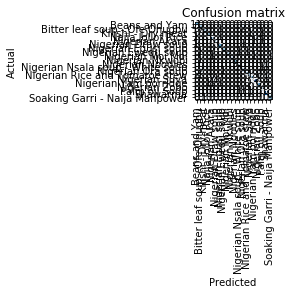

In [22]:
interpretation.plot_confusion_matrix()

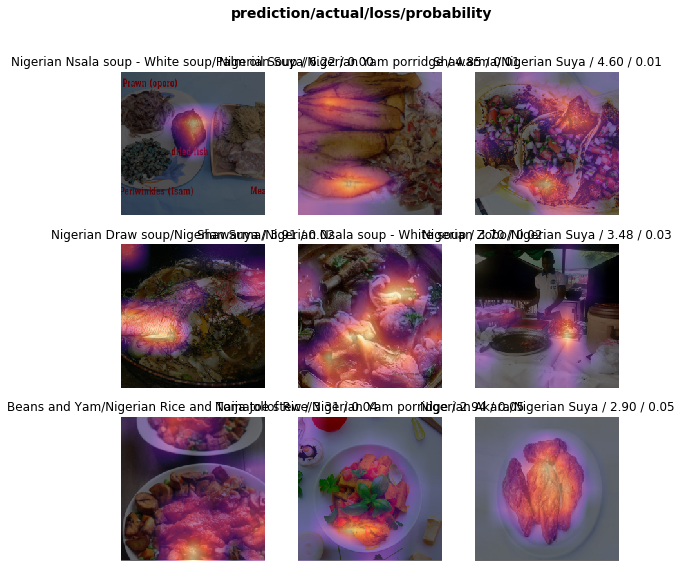

In [23]:
interpretation.plot_top_losses(9,figsize=figSize)

First thing first, let's export the content of our `Learner` object for production:

In [0]:
model.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:


In [0]:
defaults.device = torch.device('cpu')

### Exported Trained Model
Lets test our exported model with a new sample 

In [0]:
testImage = '/content/drive/My Drive/fastai/IMAG0116.jpg';testImage
image = open_image(testImage)

In [0]:
model = load_learner(path) #Loading the exported model back to our notebook

In [11]:
predictedClass = model.predict(image);predictedClass #Making inference

(Category Naija Jollof Rice,
 tensor(3),
 tensor([3.6510e-02, 3.6942e-02, 3.4510e-04, 3.4680e-01, 8.1610e-03, 3.1474e-03,
         2.6051e-01, 4.6577e-03, 1.9933e-03, 3.5954e-04, 1.8645e-03, 6.5704e-03,
         5.8872e-03, 4.6640e-02, 9.4942e-05, 4.0993e-03, 3.2809e-03, 1.0041e-03,
         9.3371e-04, 2.3020e-01]))